In [1]:
import numpy as np, h5py, glob
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

from pycbc import conversions

In [2]:
statmaps = glob.glob('/work/yifan.wang/search-high-spin/prod3-fixsub/runs/*/*/full_data/*COMBINE_STATMAP_FULL_DATA-*.hdf')

In [3]:
len(statmaps)

84

In [4]:
trigf = [h5py.File(f, 'r') for f in statmaps]

In [5]:
trigf[0]['foreground_h0']['H1L1'].keys()

<KeysViewHDF5 ['H1', 'L1', 'V1', 'decimation_factor', 'fap', 'fap_exc', 'ifar', 'ifar_exc', 'stat', 'template_id', 'timeslide_id']>

In [6]:
fore_ifar = np.array([])
supp_fore_ifar = np.array([])

for f in trigf:
    ifar = f['foreground_h0/ifar_exc'][:]
    supp_ifar = f['foreground/ifar_exc'][:]
    fore_ifar = np.append(fore_ifar, ifar)
    supp_fore_ifar = np.append(supp_fore_ifar, supp_ifar)

In [7]:
sortifar = fore_ifar.argsort()
fore_ifar = fore_ifar[sortifar]
fore_cumnum = np.arange(len(fore_ifar), 0, -1)

In [8]:
expected_ifar = np.logspace(-4., np.log10(10000),
                               num=1000, base=10.0)
fg_time = 0
for f in trigf:
    fg_time += f.attrs['foreground_time']
expected_cumnum = conversions.sec_to_year(fg_time) / expected_ifar

In [9]:
conversions.sec_to_year(fg_time)

1.2101270375440465

In [10]:
fore_ifar[-1]

17326.84544350572

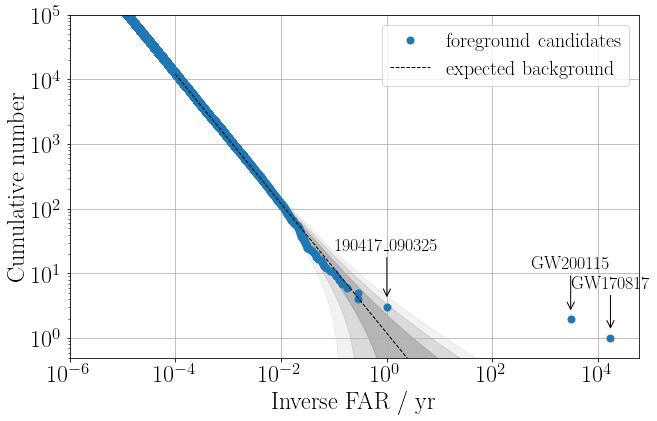

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.loglog(fore_ifar,fore_cumnum,
                 ls='none', 
        mec='C0',
        marker='.', alpha=1, label='Foreground')

ax.loglog(expected_ifar, expected_cumnum, linestyle='--', linewidth=1,
             color='black', label='Expected Background')

#plot uncertainty
sig = (expected_cumnum)**0.5
onesig_plus = expected_cumnum + sig
onesig_minus = expected_cumnum - sig
twosig_plus = expected_cumnum + 2*sig
twosig_minus = expected_cumnum - 2*sig
threesig_plus = expected_cumnum + 3*sig
threesig_minus = expected_cumnum - 3*sig

ax.fill_between(expected_ifar, onesig_minus, onesig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.4)
ax.fill_between(expected_ifar, twosig_minus, twosig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.2)
ax.fill_between(expected_ifar, threesig_minus, threesig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.1)


ax.annotate('GW170817', xy=(fore_ifar[-1],fore_cumnum[-1]+0.3), 
            xytext=(fore_ifar[-1],fore_cumnum[-1]+5),
             xycoords='data',
             textcoords='data',
            horizontalalignment="center",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),fontsize=18
           ) 

ax.annotate('GW200115', xy=(fore_ifar[-2],fore_cumnum[-2]+0.5), 
            xytext=(fore_ifar[-2],fore_cumnum[-2]+10),
             xycoords='data',
             textcoords='data',
            horizontalalignment="center",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),fontsize=18
           ) 
ax.annotate('190417\_090325', xy=(fore_ifar[-3],fore_cumnum[-3]+1), 
            xytext=(fore_ifar[-3],fore_cumnum[-3]+20),
             xycoords='data',
             textcoords='data',horizontalalignment="center",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),fontsize=18
           )
        
ax.set_ylim(0.5,1e5)
ax.set_xlim(1e-6,)
ax.set_xlabel('Inverse FAR / yr')
ax.set_ylabel('Cumulative number')
ax.legend()
fig.savefig('ifar.png',bbox_inches='tight')